# Marijuana Sales and Economic Benefits

Retail and Medical sales for Marijuana hit a record of 1.75 Billion in 2019.  Colorado has the fastest growing economy in the United States and Colorado's unemployment rate is at a six-year low.  Colorado has almost 3000 licensed businesses and over 41,000 individuals licensed to work in the industry. 

Colorado's tourism rose sustantially.  According to a report from SMARInsights, 25% of people who traveled to Colorado between 2013-2018 listed cannabis as a reason.  Legalization revenue now accoutns for roughly 3% of the state's 30 billion budget.

Companies have made more than 6.5 billion in sales over the last five years.  

In [1]:
#Dependencies and setup
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [2]:
#Load Marijuana Sales Revenue csv
sales_df = pd.read_csv("Resources/marijuana_sales.csv", dtype="object", encoding="utf-8")
sales_df


,Sales Month,Monthly Sales,Year to Date,Monthly Sales.1,Year to Date.1,Monthly Sales.2,Year to Date.2,Total to Date
0,1/1/2014,"$32,541,720","$32,541,720","$14,022,213","$14,022,213","$46,563,933","$46,563,933","$46,563,933"
1,2/1/2014,"$31,738,572","$64,280,292","$14,248,473","$28,270,686","$45,987,045","$92,550,978","$92,550,978"
2,3/1/2014,"$34,821,878","$99,102,170","$19,881,631","$48,152,317","$54,703,509","$147,254,487","$147,254,487"
3,4/1/2014,"$32,686,869","$131,789,039","$20,765,986","$68,918,303","$53,452,855","$200,707,342","$200,707,342"
4,5/1/2014,"$31,355,208","$163,144,247","$21,375,001","$90,293,304","$52,730,209","$253,437,551","$253,437,551"
...,...,...,...,...,...,...,...,...
76,5/1/2020,"$42,989,322","$166,433,459","$149,186,615","$613,043,515","$192,175,937","$779,476,974","$8,567,179,368"
77,6/1/2020,"$40,770,582","$207,204,042","$158,102,628","$771,146,143","$198,873,210","$978,350,185","$8,766,052,578"
78,7/1/2020,"$43,268,565","$250,472,606","$183,106,003","$954,252,146","$226,374,568","$1,204,724,752","$8,992,427,145"
79,8/1/2020,"$42,034,746","$292,507,353","$176,566,595","$1,130,818,741","$218,601,341","$1,423,326,094","$9,211,028,487"


In [3]:
x = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
x_axis = np.arange(2014, 2021, 1)
x_axis

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [4]:
y = [0, 50, 100, 150, 200, 250, 300]
y_axis = np.arange(0, 350, 50)
y_axis



array([  0,  50, 100, 150, 200, 250, 300])

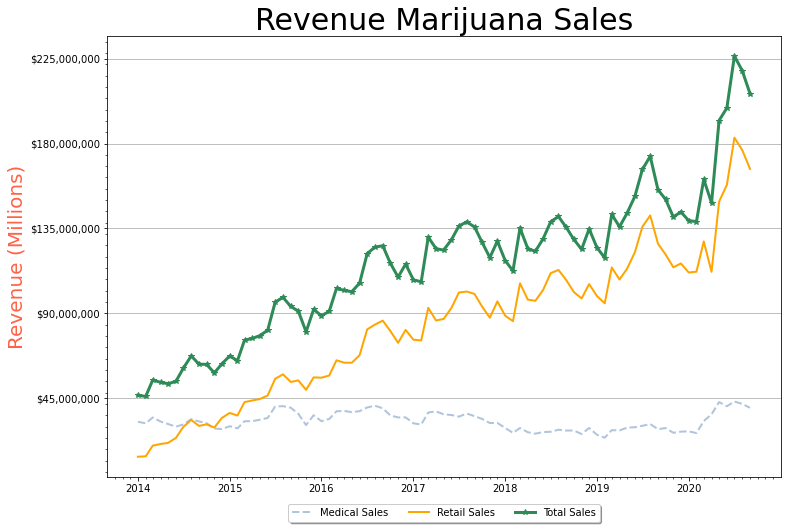

In [14]:
import matplotlib.dates as mdate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator, StrMethodFormatter)

# Get data correctly from pandas
dates = sales_df["Sales Month"].values
x_values = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in dates]
y_values1 = sales_df["Monthly Sales"].replace('[\$,]', '', regex=True).astype(float)
y_values2 = sales_df["Monthly Sales.1"].replace('[\$,]', '', regex=True).astype(float)
y_values3 = sales_df["Monthly Sales.2"].replace('[\$,]', '', regex=True).astype(float)

# Formates date to Month-Year
fig, ax = plt.subplots()

ax.xaxis.set_major_locator(mdate.YearLocator())
ax.xaxis.set_minor_locator(mdate.MonthLocator())

ax.yaxis.set_major_locator(MultipleLocator(45000000))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_minor_locator(MultipleLocator(6000000))

# Plots data
plt.plot(x_values, y_values1, "b--", lw=2, color = "lightsteelblue", label = "Medical Sales")
plt.plot(x_values, y_values2, color = "orange", lw=2, label = "Retail Sales")
plt.plot(x_values, y_values3, color = "seagreen",marker ="*", lw=3, label = "Total Sales")

#create title, xaxis, and yaxis
plt.title("Revenue Marijuana Sales", fontsize = 30)
#plt.xlabel("Year", fontsize = 20, color = "tomato" )
plt.ylabel("Revenue (Millions)", fontsize = 20, color="tomato")
plt.tight_layout()

# plays with size
axes = plt.gca()
axes.yaxis.grid()
fig.set_size_inches(14,8)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

#save image
plt.savefig("Images/marijuana_sale.png")
plt.show()